In [1]:
import os
from statistics import mean

import pandas as pd
import matplotlib.pyplot as plt

Čitanje `json` fajlova u kojima su smješteni podaci izvučeni sa *Google Trends*.

In [2]:
datasets_loc: str = "../datasets/json_queries/"

datasets: list[pd.DataFrame] = []

for root, _, files in os.walk(datasets_loc):
    for dataset in files:
        path = os.path.join(root, dataset)
        datasets.append(pd.read_json(path, orient="index"))

Ovako izgleda jedan od *datasetova*. Indeks je *datum* i on predstavlja *početak sedmice* u kojoj je podatak pretraživan, dok druga kolona ima naziv *search pojma*.

In [3]:
datasets[0].tail(10)

,airport zagreb,isPartial
2017-10-29,52,False
2017-11-05,41,False
2017-11-12,55,False
2017-11-19,18,False
2017-11-26,23,False
2017-12-03,44,False
2017-12-10,11,False
2017-12-17,30,False
2017-12-24,34,False
2017-12-31,22,False


Sad za svaki određen datum pridružujemo tzv. *score* svih *pojmova* (pojmovi se nalaze u `queries.json`). *Score* mjeri intenzitet pretrage pojma na određenom intervalu i kreće se od $0$ (*veoma malo ljudi* je pretraživalo pojam) do $100$ (*jako mnogo ljudi* je pretraživalo pojam).


In [4]:
scores: dict[pd.DatetimeIndex, list[int]] = {}
to_plot: list[float] = []

for df in datasets:
    query = df.columns[0]
    for date in df.index:
        if date not in scores:
            scores[date] = []
        scores[date].append(df[query][date])

Računamo onda *srednju vrijednost* prikupljenih *score* rezultata za svaki datum.

In [5]:
for date in scores:
    to_plot.append(mean(scores[date]))

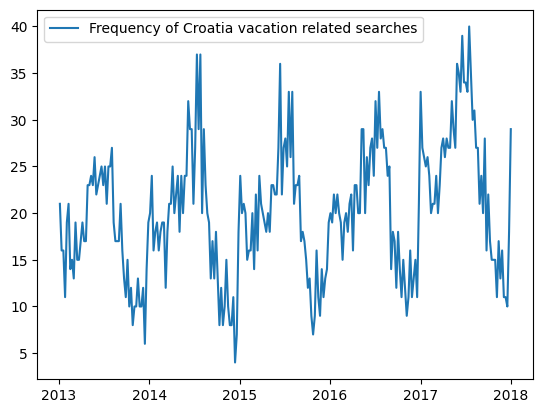

In [6]:
plt.plot(list(scores.keys()), to_plot)
plt.legend(["Frequency of Croatia vacation related searches"])
plt.show()